In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("df_ML"
".csv")

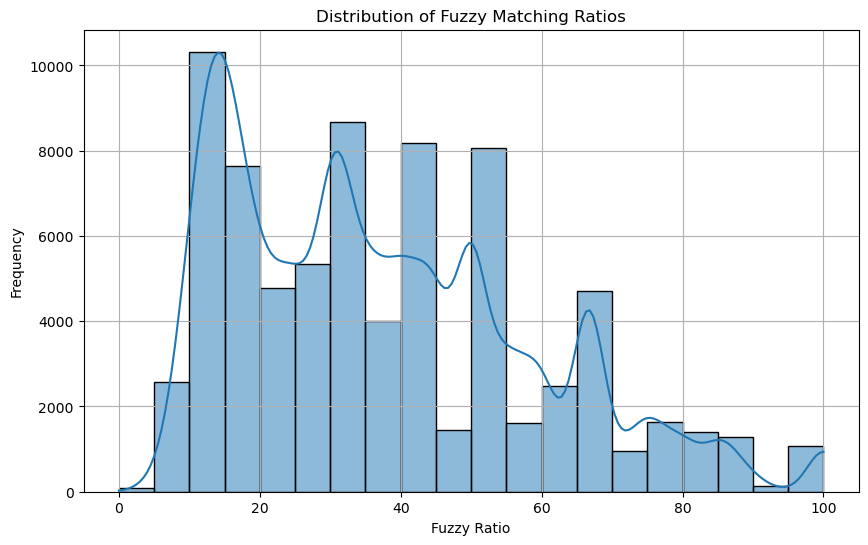

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(df['fuzzy_ratio'], bins=20, kde=True)
plt.title('Distribution of Fuzzy Matching Ratios')
plt.xlabel('Fuzzy Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

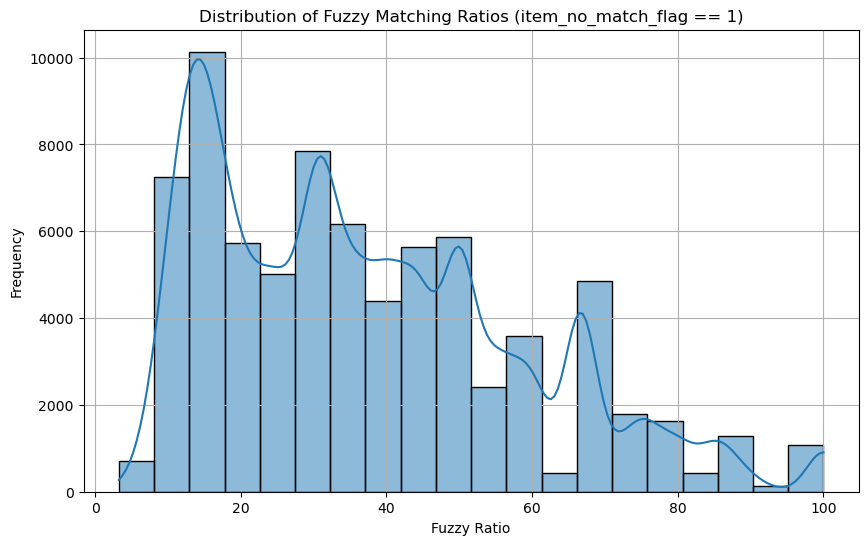

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['item_no_match_flag'] == 1]['fuzzy_ratio'], bins=20, kde=True)
plt.title('Distribution of Fuzzy Matching Ratios (item_no_match_flag == 1)')
plt.xlabel('Fuzzy Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

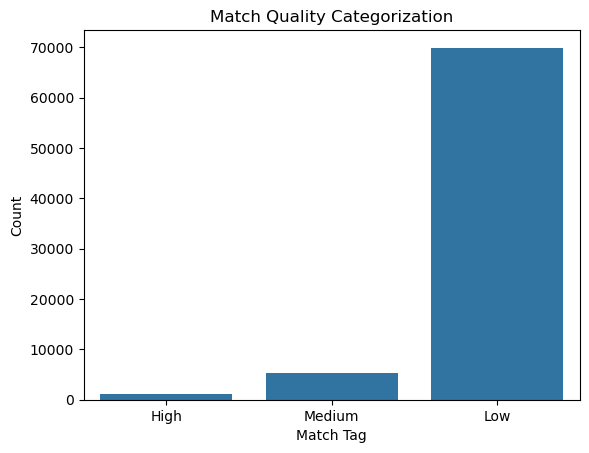

In [6]:
sns.countplot(data=df, x='match_tag', order=['High', 'Medium', 'Low'])
plt.title('Match Quality Categorization')
plt.xlabel('Match Tag')
plt.ylabel('Count')
plt.show()


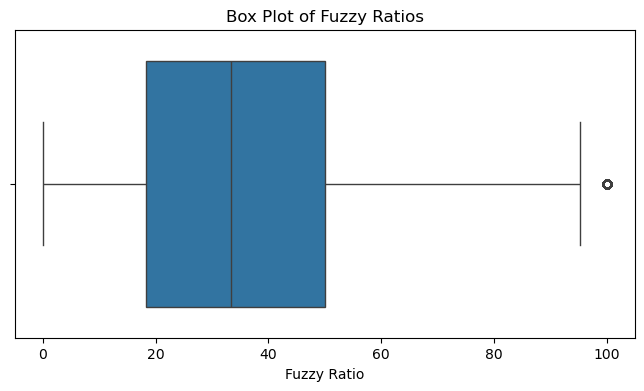

In [7]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['fuzzy_ratio'])
plt.title('Box Plot of Fuzzy Ratios')
plt.xlabel('Fuzzy Ratio')
plt.show()


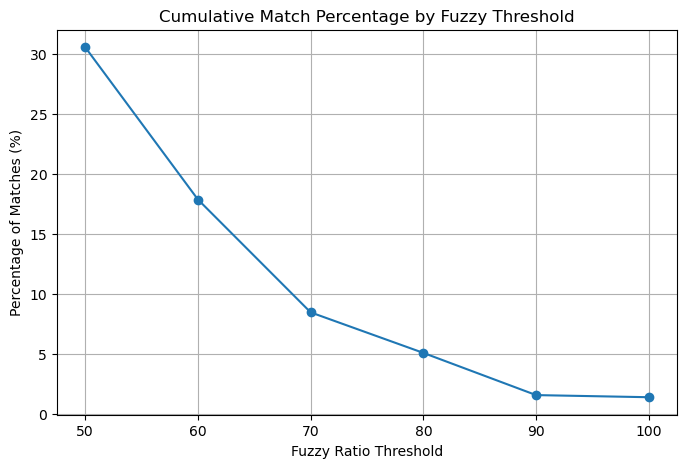

In [8]:
thresholds = range(50, 101, 10)
matches = [(t, (df['fuzzy_ratio'] >= t).mean()*100) for t in thresholds]

x, y = zip(*matches)
plt.figure(figsize=(8, 5))
plt.plot(x, y, marker='o')
plt.title('Cumulative Match Percentage by Fuzzy Threshold')
plt.xlabel('Fuzzy Ratio Threshold')
plt.ylabel('Percentage of Matches (%)')
plt.grid(True)
plt.show()



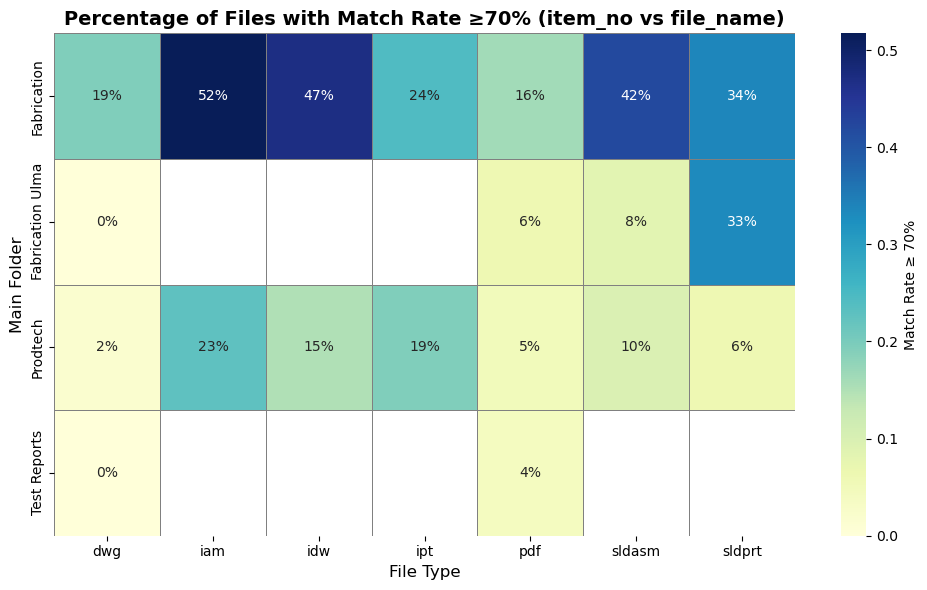

In [9]:
match_rate = 70

df['match_flag_02'] = (df['fuzzy_ratio'] >= match_rate).astype(int)

filetype_cols = ['pdf', 'dwg', 'sldprt', 'sldasm', 'ipt', 'iam', 'idw']


# Melt the file types into long format
df_long = df.melt(
    id_vars=['main_folder', 'match_flag_02'],
    value_vars=filetype_cols,
    var_name='file_type',
    value_name='has_file'
)

# Only keep rows where the file exists (value == 1)
df_long = df_long[df_long['has_file'] == 1]



pivot_flag = df_long.pivot_table(
    index='main_folder',
    columns='file_type',
    values='match_flag_02',
    aggfunc='mean',
    fill_value=np.nan  # Keep NaNs for masking
)


plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_flag,
    annot=True,
    fmt=".0%",
    cmap="YlGnBu",
    linewidths=0.5,
    linecolor='gray',
    mask=pivot_flag.isnull(),
    cbar_kws={'label': f'Match Rate ≥ {match_rate}%'}
)

plt.title(f'Percentage of Files with Match Rate ≥{match_rate}% (item_no vs file_name)', fontsize=14, weight='bold')
plt.xlabel('File Type', fontsize=12)
plt.ylabel('Main Folder', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()